# ***importing section reading dataset and printing basic info***

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/gold_data.csv')

In [3]:
df.head()

,Date,Price,Open,High,Low,Volume
0,29/09/2015,1127.1,1132.4,1133.6,1123.9,0.25
1,30/09/2015,1115.5,1127.5,1127.5,1111.3,0.28
2,01/10/2015,1114.0,1114.9,1118.3,1111.0,0.26
3,02/10/2015,1136.7,1113.0,1140.7,1105.0,0.47
4,05/10/2015,1137.7,1138.7,1141.3,1129.8,0.20


In [4]:
df.shape

(1804, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1804 non-null   object 
 1   Price   1804 non-null   float64
 2   Open    1804 non-null   float64
 3   High    1804 non-null   float64
 4   Low     1804 non-null   float64
 5   Volume  1804 non-null   float64
dtypes: float64(5), object(1)
memory usage: 84.7+ KB


In [6]:
df.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
dtype: int64

In [7]:
df.describe()

,Price,Open,High,Low,Volume
count,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000
mean,1480.877644,1478.720355,1487.743110,1469.452300,93.260327
std,276.132747,273.356556,275.498167,270.560201,137.485763
min,1049.700000,1051.100000,1062.700000,1045.700000,0.000000
25%,1257.225000,1257.675000,1264.975000,1251.675000,0.580000
50%,1334.600000,1334.700000,1341.750000,1326.850000,1.895000
75%,1787.750000,1783.250000,1791.050000,1774.425000,205.345000
max,2054.600000,2062.400000,2085.200000,2033.600000,816.530000


In [8]:
df.nunique()

Date      1804
Price     1546
Open      1527
High      1537
Low       1535
Volume    1037
dtype: int64

# ***heat map and important features extract***

In [9]:
df=df.drop(['Date'],axis=1)

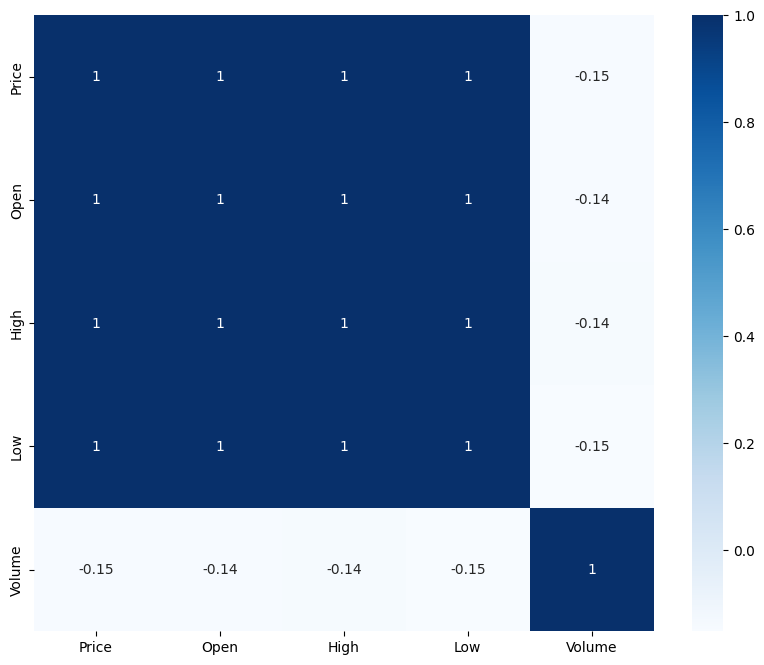

In [10]:
# Create a heatmap of the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

In [11]:
corr_matrix['Price']

Price     1.000000
Open      0.998550
High      0.999073
Low       0.999117
Volume   -0.145635
Name: Price, dtype: float64

# ***graphical representation***

<ipython-input-12-8b39ad6420bc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'] ,color='Blue')


<Axes: xlabel='Price', ylabel='Density'>

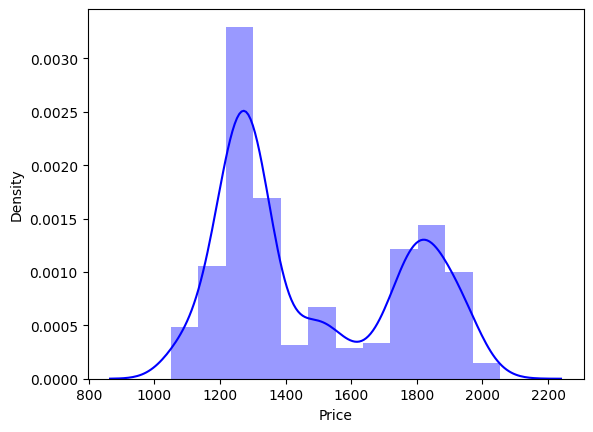

In [12]:
sns.distplot(df['Price'] ,color='Blue')

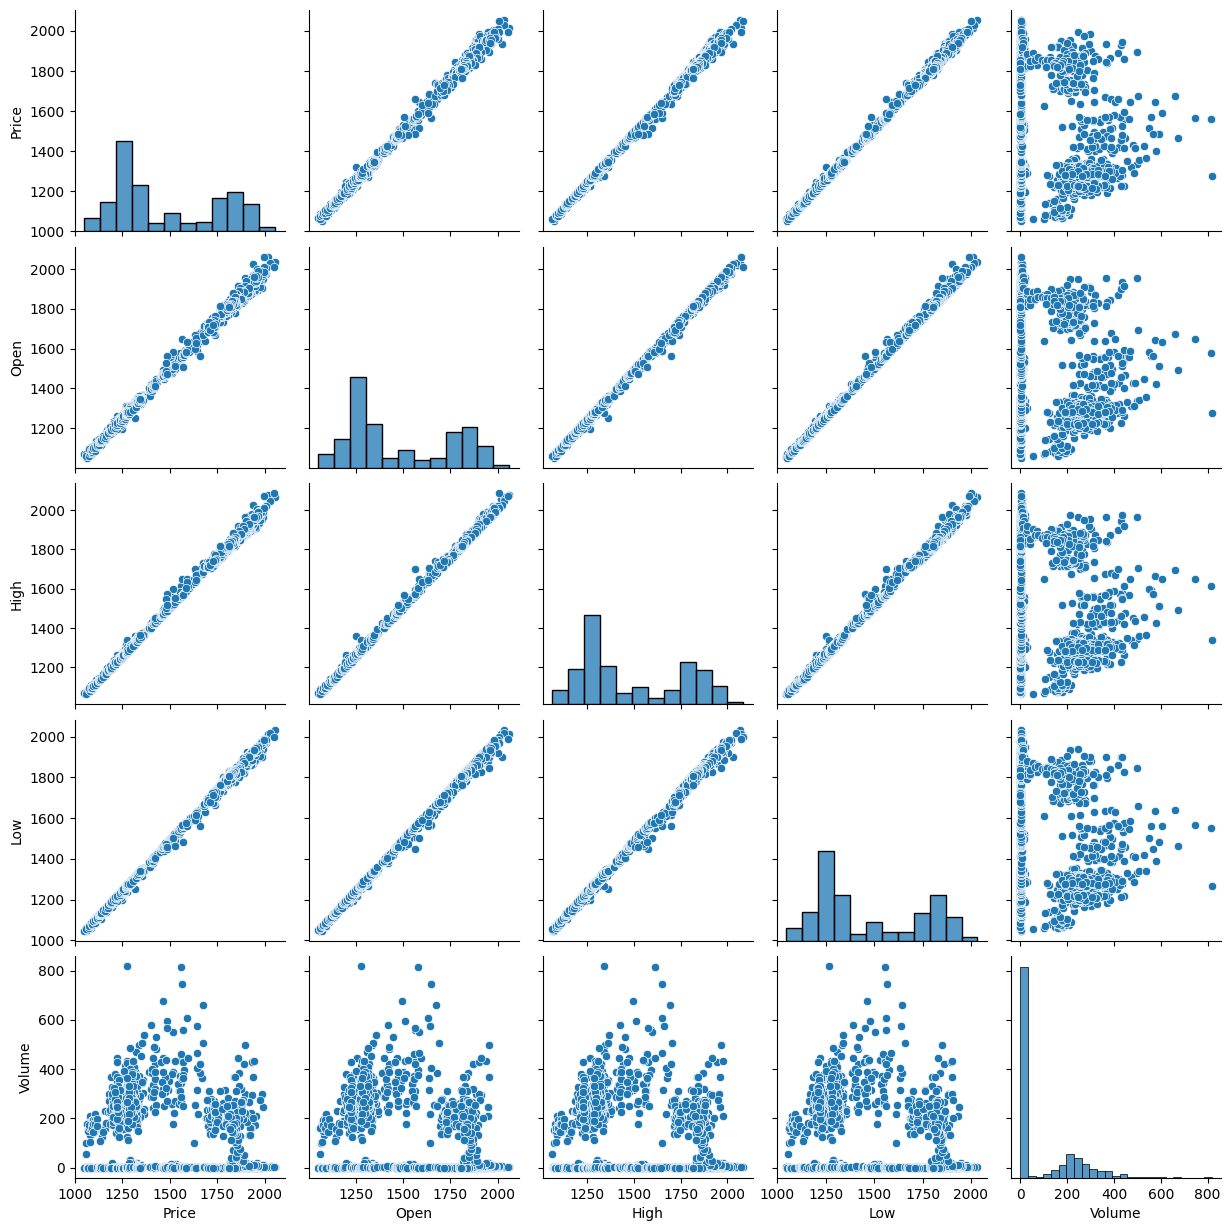

In [13]:
sns.pairplot(df)
plt.show()

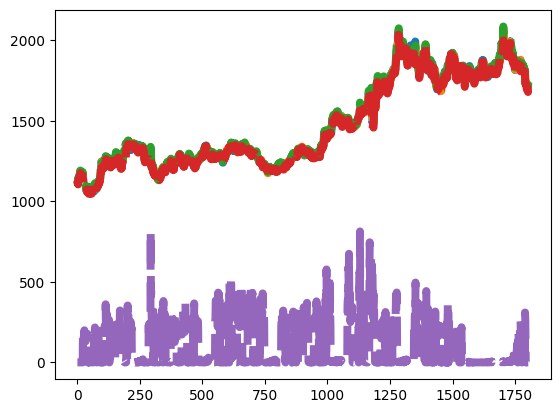

In [14]:
plt.plot(df, linestyle = '--', linewidth='5.7')

plt.show()

# ***traning the model***

In [15]:
# prompt: train test split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (1443, 4)
y_train shape: (1443,)
X_test shape: (361, 4)
y_test shape: (361,)


In [16]:
reg=LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

# ***testing the model***

In [17]:
reg.predict(X_test)

array([1284.65050845, 1807.47269694, 1845.22463004, 1292.56834439,
       1276.74765144, 1272.1632725 , 1251.01424477, 1174.49841337,
       1263.66413859, 1278.56659248, 1330.72443145, 1251.77522047,
       1232.97516244, 1314.28508363, 1851.23090515, 1295.22284381,
       1314.87071611, 1352.05233667, 1354.20909309, 1828.87491501,
       1258.52041237, 1798.23001152, 1300.37027732, 1786.63145463,
       1219.44320965, 1882.71324124, 1224.69770719, 1200.70355062,
       1926.00413887, 1304.11079541, 1351.60700921, 1980.54845119,
       1562.89463272, 1341.22578979, 1766.33657189, 1284.7452567 ,
       1267.98514283, 1819.97012761, 1933.12593869, 1872.28560877,
       1952.74345586, 1700.94379279, 1132.23593732, 1931.63064049,
       1286.51544881, 1246.2498928 , 1335.75602981, 1333.79772399,
       1278.36993171, 1150.56572585, 1505.30979594, 1833.24571724,
       1287.9222257 , 1668.53341151, 1270.68196852, 1284.75003772,
       1766.16350584, 1289.86922187, 1252.51661477, 1256.06250

In [18]:
# prompt: predicte accuracy in linear regression

from sklearn.metrics import r2_score

y_pred = reg.predict(X_test)
r2_score_linearRegression = r2_score(y_test, y_pred)
print("R2 score:", r2_score_linearRegression)


R2 score: 0.9989140905257965


# ***output graph***

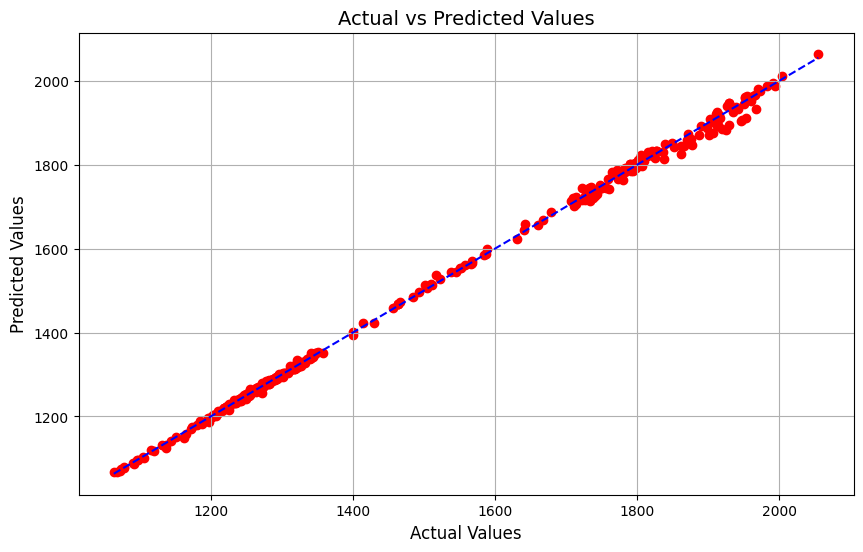

In [19]:
# prompt: i want to make graph for y_predict and y_test

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.grid(True)
plt.show()


In [20]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))

5.9576819069512625


In [21]:
print(metrics.mean_squared_error(y_test,y_pred))

86.13299925329514


In [22]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

9.28078656436485
